# Arbitrary forcing of a single degree of freedom system

[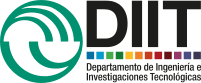](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2025 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

## Periodic forcing

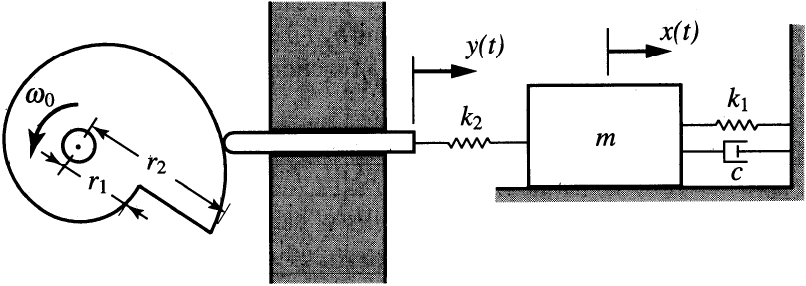

The *cam* pushes the *follower* which is pressed at the opposite end by a spring with elastic constant $k_2$.
The constant speed rotation $\omega_0$ of the motor attached to the cam results in a position for this end of the follower $y(t)$, which is periodic with period $T_0 = \frac{2 \pi}{\omega_0}$.

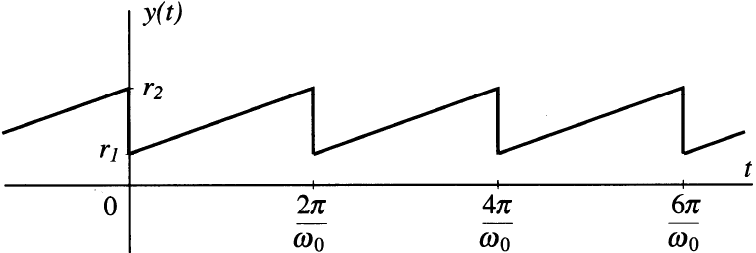

Consequently, the force that this spring exerts on $m$ also maintains this same period.

### Fourier series

> **References**
>- Section 14.12 "Fourier Analysis". Jerry B. Marion. Classical Dynamics of particles and systems. Academic Press.
> - https://en.wikipedia.org/wiki/Fourier_series  
> - https://mathworld.wolfram.com/FourierSeries.html

This force, like any other periodic force, can be decomposed into a harmonic basis of sines and cosines that are periodic with period $T$:
$$
\cos{\left( n \frac{2 \pi}{T} t \right)}\\
\sin{\left( n \frac{2 \pi}{T} t \right)}
$$
The decomposition operation is a projection onto the elements of this basis:
$$
a_0 = \frac{2}{T} \int_0^{T} F(t) dt \\
a_n = \frac{2}{T} \int_0^{T} F(t) \cos{\left( n \frac{2 \pi}{T} t \right)} dt \\
b_n = \frac{2}{T} \int_0^{T} F(t) \sin{\left( n \frac{2 \pi}{T} t \right)} dt
$$
This results in an infinite series called the **Fourier series**:
$$
F(t) = \frac{a_0}{2} + \sum_{n=1}^\infty \left[
a_n \cos{\left( n \frac{2 \pi}{T} t \right)} +
b_n \sin{\left( n \frac{2 \pi}{T} t \right)}
\right]
$$

In [1]:
import sympy as sm # import functions for symbolic manipulations
from sympy.physics import mechanics as me
me.init_vprinting() # dot notation for velocity and acceleration

In [2]:
t = sm.symbols('t') # time
m, k1, k2, l1, l2, c, omega0, r1, r2 = sm.symbols('m, k_1, k_2, l_1, l_2, c, omega_0, r_1, r_2', positive = True)
F2_symbol, y, x = me.dynamicsymbols('F_2 y x')

I will consider that the springs have natural lengths $l_1$ and $l_2$.

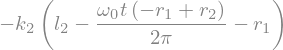

In [3]:
T0 = 2* sm.pi/ omega0
y = r1+ (r2- r1)* (t/T0)
F2 = -k2* (l2- y)
F2

We set the parameters for this system to graph a particular $F_2(t)$.

In [4]:
m_magnitude = 10 # [kg]
k1_magnitude = 1.0E3 # [N m-1]
k2_magnitude = 8.0E3 # [N m-1]
r1_magnitude = 0.1 # [m]
r2_magnitude = 0.15 # [m]
l1_magnitude = 0.5 # [m]
l2_magnitude = r1_magnitude # [m] (so that the spring does not extert a force in the lowest point of the cam)
c_magnitude = 40 # [N m-1 s]
omega0_rmp = 6 # [rpm]
omega0_magnitude = (omega0_rmp/60)* 2* sm.pi # [rad s-1]

parameters = {
    m : m_magnitude,
    k1 : k1_magnitude,
    k2 : k2_magnitude,
    r1 : r1_magnitude,
    r2 : r2_magnitude,
    l1 : l1_magnitude,
    l2 : l2_magnitude,
    c : c_magnitude,
    omega0 : omega0_magnitude
}

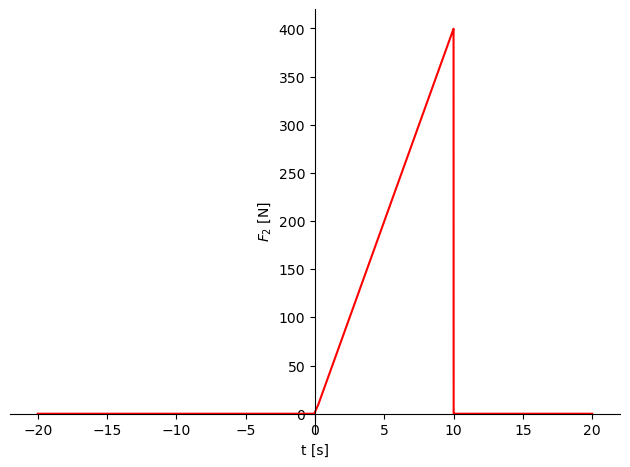

In [5]:
T0_num = T0.subs(parameters)
F2_onePeriod = sm.Piecewise((0,t<0), (0,t> T0_num), (F2,True))
F2_onePeriod_plot = sm.plot(F2_onePeriod.subs(parameters),
                             (t, -(2* T0_num), (2* T0_num) ),
                             ylabel='$F_2$ [N]', xlabel='t [s]', line_color= 'r', show=False )
F2_onePeriod_plot.show()

Let's calculate the coefficients of the Fourier series for the function with that period.

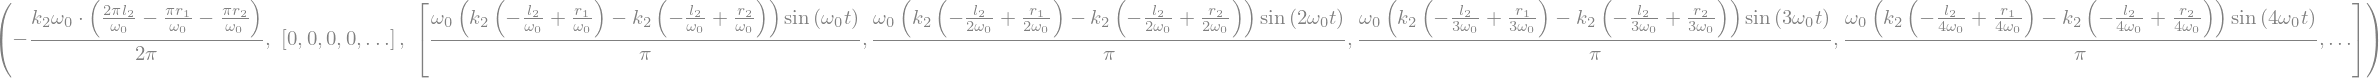

In [6]:
F2_FourierSeries = sm.fourier_series(F2, limits=(t, 0, T0) )
F2_FourierSeries.a0, F2_FourierSeries.an, F2_FourierSeries.bn

This infinite series can be truncated at a finite number of terms.

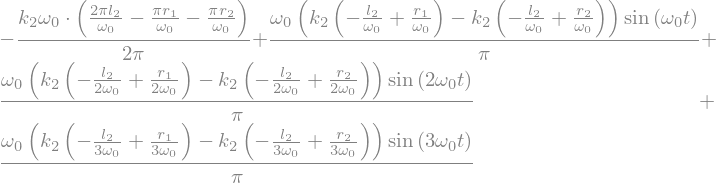

In [7]:
F2_FourierSeries.truncate(n=4) # first 4 terms

We can get a pretty good representation of $F(t)$ using just a few terms.

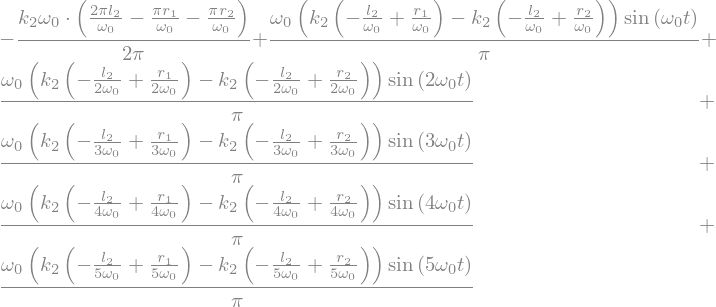

In [8]:
F2_FourierSeries_fewTerms = F2_FourierSeries.truncate(6)
F2_FourierSeries_fewTerms

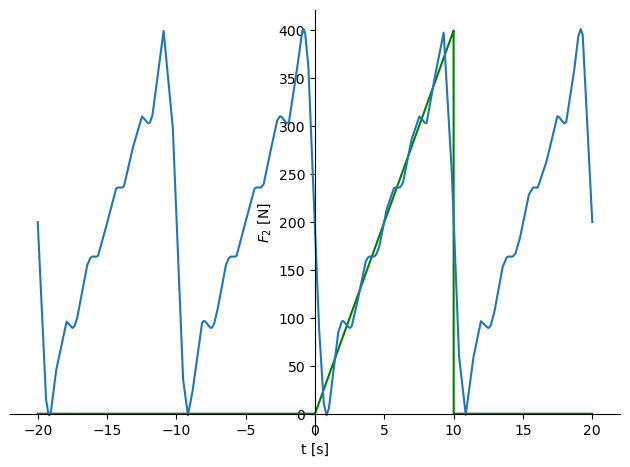

In [9]:
F2_FourierSeries_plot = sm.plot(F2_onePeriod.subs(parameters),
                                F2_FourierSeries_fewTerms.subs(parameters),
                                (t, -2* T0_num, 2* T0_num ),
                                ylabel='$F_2$ [N]', xlabel='t [s]',
                                show=False )
F2_FourierSeries_plot[0].line_color='g'
F2_FourierSeries_plot.show()

Since the differential equation for a forced system is linear, the effect of each of the $n$ harmonics in the series can be calculated separately and then each corresponding particular solution $x_{pn}$ can be summed.
In the terminology of linear differential equations, this is what the **principle of superposition** indicates.

## Resulting dynamics

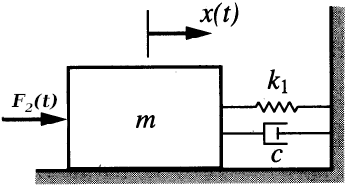

Having found the forcing $F_2(t)$, this system is equivalent to the systems analyzed previously.

In [10]:
x_EL_homogeneous = m* x.diff(t,2) + c* x.diff(t) + k1* x
x_EL_forced = sm.Eq(x_EL_homogeneous, F2_symbol)
x_EL_forced

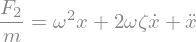

In [11]:
omega, zeta = sm.symbols('omega zeta', real = True)
x_EL_ing = sm.Eq(x_EL_forced.lhs/m, x_EL_forced.rhs/m).expand()
x_EL_ing = x_EL_ing.subs([(k1/m, omega**2), (c/m, 2* zeta* omega) ]).simplify()
x_EL_ing.expand()

We replace $F_2$ with the truncated Fourier series.

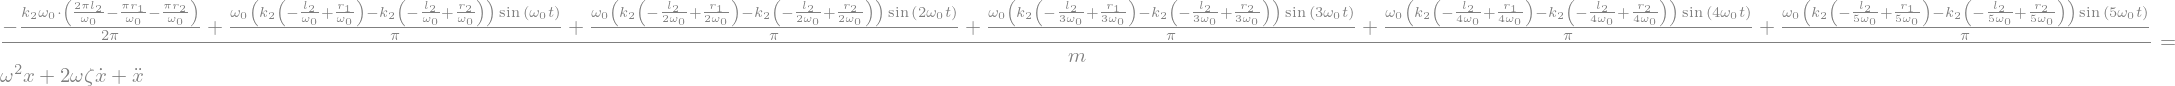

In [12]:
x_EL_forced = x_EL_ing.expand().subs(F2_symbol, F2_FourierSeries_fewTerms)
x_EL_forced

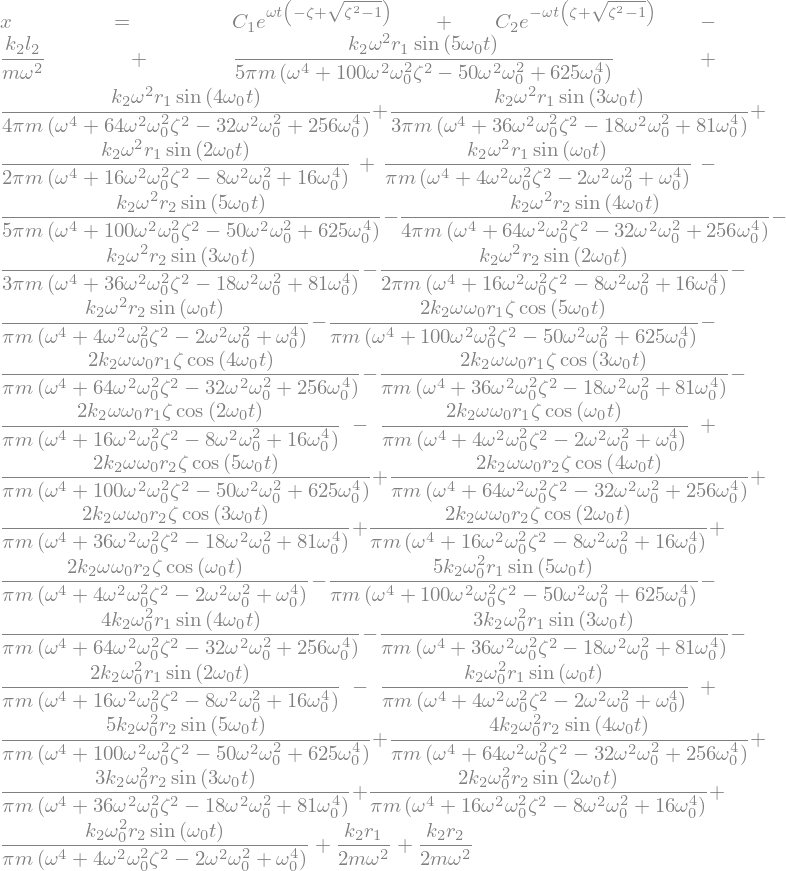

In [13]:
x_forced_sol = sm.dsolve(x_EL_forced)
x_forced_sol

Since we are interested in the steady-state solution, we remove the terms corresponding to the homogeneous solution by setting $C_1 = C_2 = 0$.

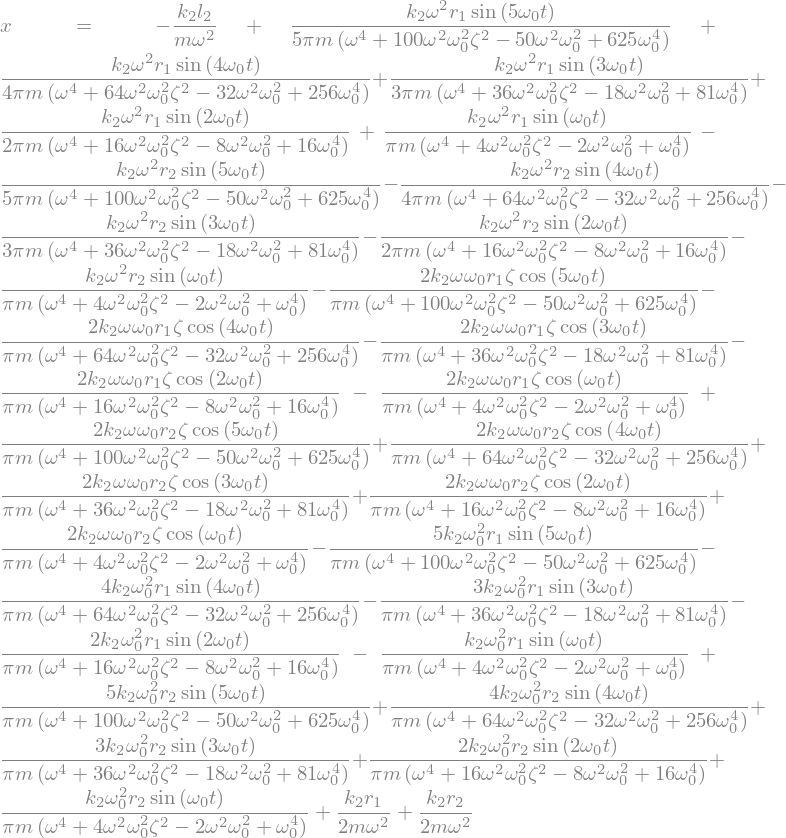

In [14]:
x_forcedHarmonic = x_forced_sol.subs([('C1', 0), ('C2', 0)])
x_forcedHarmonic

We can analyze the dynamics by graphing $x(t)$.

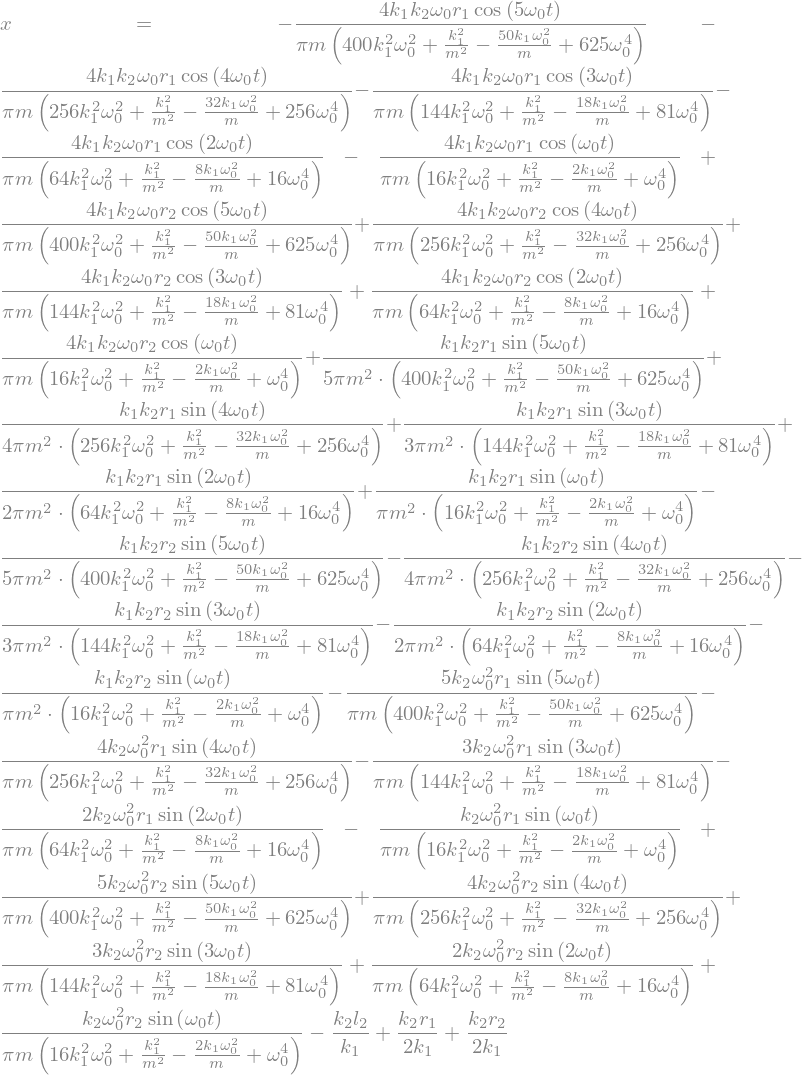

In [15]:
parametersHomogeneous ={
    zeta : 2* sm.sqrt(k1* m),
    omega : sm.sqrt(k1/m)
}
x_parametersHomogeneous = x_forcedHarmonic.subs(parametersHomogeneous)
x_parametersHomogeneous

Finally, the physical parameters.

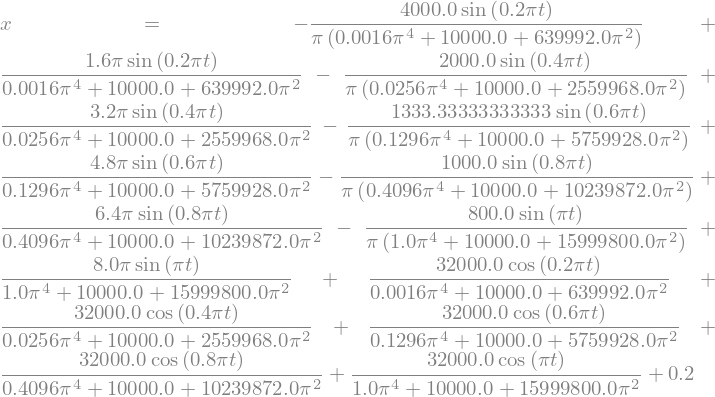

In [16]:
x_numeric = x_parametersHomogeneous.subs(parameters)
x_numeric

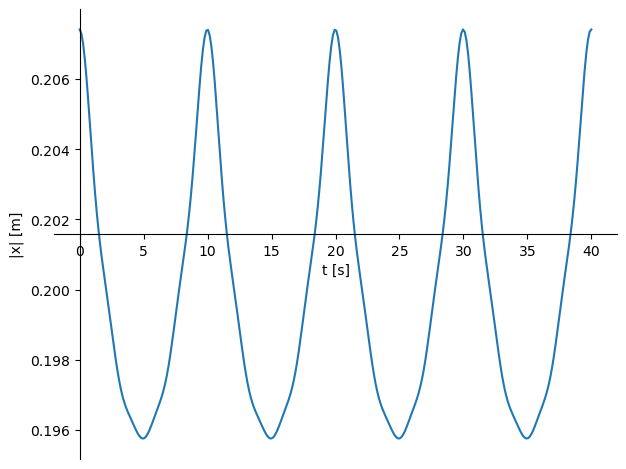

In [17]:
sm.plot(x_numeric.rhs, (t,0, 4* T0_num), ylabel='|x| [m]', xlabel='t [s]', adaptive=False, nb_of_points=300) 